# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
#     !apt-get install protobuf-compiler
    !brew install protobuf
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python3 -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python3 setup.py build && python3 setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
ctlptl          erofs-utils     ivtools         pinot           zbctl
cwb3            fprettify       netmask         scalingo        zk
==> Updated Formulae
Updated 570 formulae.
==> Renamed Formulae
annie -> lux
==> Deleted Formulae
rawtoaces
==> New Casks
athens                     doughnut                   lunasea
cleanmymac-zh              fishing-funds              nordlayer
clover                     foxit-pdf-editor           notion-enhanced
creality-slicer            jump-desktop-connect       openbci
dbgate                     kmeet                      pluginval
==> Updated Casks
Updated 729 casks.
==> Deleted Casks
aio-creator-neo            omx-ebooks                 trayplay
aleo-studio                pixelpeeper                web-sharing
art-directors-toolkit      rcse                       wwdcsrt
getrasplex                 sickbeard-anim

  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1650593 sha256=3e2b1428077270349ebffc9a43d6be75ff4e41a523df434ce771459d2c19edc5
  Stored in directory: /private/var/folders/_h/qc64ldzs2cg131h8xbw_plmr0000gn/T/pip-ephem-wheel-cache-sueugxif/wheels/9e/2f/a3/f2a88619eabd5979ec0e1735b9bf0946ba2413a65a6d0c6631
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [6]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python3 {VERIFICATION_SCRIPT}

Running tests under Python 3.9.10: /Users/jonathanli/Dev/Xilinx Package Detection/XPDCourse/xpd/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-20 13:41:37.079533: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jonathanli/Dev/Xilinx Package Detection/XPDCourse/xpd/lib/python3.9/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0320 13:41:37.361783 4524137984 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.

I0320 13:41:43.272258 4524137984 efficientnet_model.py:147] round_filter input=24 output=24
I0320 13:41:43.272408 4524137984 efficientnet_model.py:147] round_filter input=40 output=40
I0320 13:41:43.501120 4524137984 efficientnet_model.py:147] round_filter input=40 output=40
I0320 13:41:43.501677 4524137984 efficientnet_model.py:147] round_filter input=80 output=80
I0320 13:41:43.825602 4524137984 efficientnet_model.py:147] round_filter input=80 output=80
I0320 13:41:43.825748 4524137984 efficientnet_model.py:147] round_filter input=112 output=112
I0320 13:41:44.273390 4524137984 efficientnet_model.py:147] round_filter input=112 output=112
I0320 13:41:44.273530 4524137984 efficientnet_model.py:147] round_filter input=192 output=192
I0320 13:41:44.615812 4524137984 efficientnet_model.py:147] round_filter input=192 output=192
I0320 13:41:44.615957 4524137984 efficientnet_model.py:147] round_filter input=320 output=320
I0320 13:41:44.695012 4524137984 efficientnet_model.py:147] round_filt

I0320 13:41:49.086441 4524137984 efficientnet_model.py:147] round_filter input=1280 output=1408
I0320 13:41:49.186270 4524137984 efficientnet_model.py:457] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

I0320 13:41:55.754265 4524137984 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b5
I0320 13:41:55.754414 4524137984 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I0320 13:41:55.754477 4524137984 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 7
I0320 13:41:55.756005 4524137984 efficientnet_model.py:147] round_filter input=32 output=48
I0320 13:41:55.771601 4524137984 efficientnet_model.py:147] round_filter input=32 output=48
I0320 13:41:55.771774 4524137984 efficientnet_model.py:147] round_filter input=16 output=24
I0320 13:41:55.980861 4524137984 efficientnet_model.py:147] round_filter input=16 output=24
I0320 13:41:55.981007 4524137984 efficientnet_model.py:147] round_filter input=24 output=40
I0320 13:41:56.657585 4524137984 efficientnet_model.py:147] round_filter input=24 output=40
I0320 13:41:56.657763 4524137984 efficientnet_model.py:147] round_fil

I0320 13:42:12.222028 4524137984 efficientnet_model.py:147] round_filter input=24 output=48
I0320 13:42:12.222183 4524137984 efficientnet_model.py:147] round_filter input=40 output=80
I0320 13:42:12.814212 4524137984 efficientnet_model.py:147] round_filter input=40 output=80
I0320 13:42:12.814351 4524137984 efficientnet_model.py:147] round_filter input=80 output=160
I0320 13:42:13.750134 4524137984 efficientnet_model.py:147] round_filter input=80 output=160
I0320 13:42:13.750277 4524137984 efficientnet_model.py:147] round_filter input=112 output=224
I0320 13:42:15.144219 4524137984 efficientnet_model.py:147] round_filter input=112 output=224
I0320 13:42:15.144366 4524137984 efficientnet_model.py:147] round_filter input=192 output=384
I0320 13:42:16.967267 4524137984 efficientnet_model.py:147] round_filter input=192 output=384
I0320 13:42:16.967406 4524137984 efficientnet_model.py:147] round_filter input=320 output=640
I0320 13:42:17.704009 4524137984 efficientnet_model.py:147] round_fi

In [11]:
!pip install tensorflow --upgrade

In [12]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.1
Uninstalling protobuf-3.19.1:
  Successfully uninstalled protobuf-3.19.1
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
     |████████████████████████████████| 1.0 MB 2.2 MB/s            
  Using cached matplotlib-3.2.0-cp39-cp39-macosx_11_0_x86_64.whl


In [7]:
import object_detection

In [8]:
!pip list

Package                       Version
----------------------------- ----------
absl-py                       0.12.0
apache-beam                   2.35.0
appnope                       0.1.2
astunparse                    1.6.3
attrs                         21.4.0
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    4.2.4
certifi                       2021.10.8
charset-normalizer            2.0.9
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.26
debugpy                       1.5.1
decorator                     5.1.0
dill                          0.3.1.1
dm-tree                       0.1.6
docopt                        0.6.2
entrypoints                   0.3
fastavro                      1.4.8
flatbuffers                   2.0
fonttools                     4.28.5
future                        0.18.2
gast       

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-01-15 11:29:02--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.68.176, 2607:f8b0:4023:1004::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.68.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  5.56MB/s    in 3.8s    

2022-01-15 11:29:07 (5.19 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_

# 2. Create Label Map

In [9]:
labels = [{'name':'Package', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

# 4. Copy Model Config to Training Folder

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Setup Train and Evaluate Functions

In [40]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [41]:
def load_train_images(folder='train_1'):
    !rm {os.path.join(paths['IMAGE_PATH'], 'train', '*')}
    !cp {os.path.join(paths['IMAGE_PATH'], folder, '*')} {os.path.join(paths['IMAGE_PATH'], 'train')}

In [42]:
def load_test_images(folder='test_1'):
    !rm {os.path.join(paths['IMAGE_PATH'], 'test', '*')}
    !cp {os.path.join(paths['IMAGE_PATH'], folder, '*')} {os.path.join(paths['IMAGE_PATH'], 'test')}

In [43]:
def create_tf_records():
    # OPTIONAL IF RUNNING ON COLAB
    ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
    if os.path.exists(ARCHIVE_FILES):
      !tar -zxvf {ARCHIVE_FILES}

    if not os.path.exists(files['TF_RECORD_SCRIPT']):
        !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

    !python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
    !python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

In [44]:
def train_model(note="train_1"):
    !date > {os.path.join(paths['IMAGE_PATH'], note + '_log.txt')}
    
    TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
    command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
    print(command)
    !{command}
    
    !date >> {os.path.join(paths['IMAGE_PATH'], note + '_log.txt')}

In [45]:
def evaluate_model(note="test_1"):
    !date > {os.path.join(paths['IMAGE_PATH'], note + '_log.txt')}    
    
    command = "python3 {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
    print(command)
    !{command}
    
    !date >> {os.path.join(paths['IMAGE_PATH'], note + '_log.txt')}

# 7. Train and Evaluate the Model

In [50]:
load_train_images('train_pkg')
load_test_images('test_pkg')
create_tf_records()
train_model("train_pkg")
evaluate_model("test_pkg")

# load_train_images('train_1')
# load_test_images('test_1')
# create_tf_records()
# train_model("train_1")
# evaluate_model("test_1")

# load_train_images('train_2')
# load_test_images('test_2')
# create_tf_records()
# train_model("train_2")
# evaluate_model("test_2")

# load_train_images('train_4')
# load_test_images('test_4')
# create_tf_records()
# train_model("train_4")
# evaluate_model("test_4")

# load_train_images('train_8')
# load_test_images('test_8')
# create_tf_records()
# train_model("train_8")
# evaluate_model("test_8")

# load_train_images('train_all')
# load_test_images('test_all')
# create_tf_records()
# train_model("train_all")
# evaluate_model("test_all")

# load_train_images('train_package')
# load_test_images('test_package')
# create_tf_records()
# train_model("train_package")
# evaluate_model("test_package")

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record
python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000
2021-12-29 18:42:14.027691: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1229 18:42:14.028868 4815388160 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1229 18:42:14.07

INFO:tensorflow:Step 100 per-step time 1.648s
I1229 18:45:41.900837 4815388160 model_lib_v2.py:705] Step 100 per-step time 1.648s
INFO:tensorflow:{'Loss/classification_loss': 0.24022499,
 'Loss/localization_loss': 0.2454133,
 'Loss/regularization_loss': 0.1541469,
 'Loss/total_loss': 0.6397852,
 'learning_rate': 0.0319994}
I1229 18:45:41.901137 4815388160 model_lib_v2.py:708] {'Loss/classification_loss': 0.24022499,
 'Loss/localization_loss': 0.2454133,
 'Loss/regularization_loss': 0.1541469,
 'Loss/total_loss': 0.6397852,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 1.294s
I1229 18:47:51.299365 4815388160 model_lib_v2.py:705] Step 200 per-step time 1.294s
INFO:tensorflow:{'Loss/classification_loss': 0.18567197,
 'Loss/localization_loss': 0.16105393,
 'Loss/regularization_loss': 0.15417343,
 'Loss/total_loss': 0.5008993,
 'learning_rate': 0.0373328}
I1229 18:47:51.299621 4815388160 model_lib_v2.py:708] {'Loss/classification_loss': 0.18567197,
 'Loss/localization_

INFO:tensorflow:Step 1600 per-step time 1.273s
I1229 19:17:37.193738 4815388160 model_lib_v2.py:705] Step 1600 per-step time 1.273s
INFO:tensorflow:{'Loss/classification_loss': 0.052123077,
 'Loss/localization_loss': 0.026732165,
 'Loss/regularization_loss': 0.14668612,
 'Loss/total_loss': 0.22554137,
 'learning_rate': 0.079970405}
I1229 19:17:37.193979 4815388160 model_lib_v2.py:708] {'Loss/classification_loss': 0.052123077,
 'Loss/localization_loss': 0.026732165,
 'Loss/regularization_loss': 0.14668612,
 'Loss/total_loss': 0.22554137,
 'learning_rate': 0.079970405}
INFO:tensorflow:Step 1700 per-step time 1.273s
I1229 19:19:44.448548 4815388160 model_lib_v2.py:705] Step 1700 per-step time 1.273s
INFO:tensorflow:{'Loss/classification_loss': 0.10211701,
 'Loss/localization_loss': 0.03431705,
 'Loss/regularization_loss': 0.14595234,
 'Loss/total_loss': 0.2823864,
 'learning_rate': 0.07995972}
I1229 19:19:44.448790 4815388160 model_lib_v2.py:708] {'Loss/classification_loss': 0.10211701,
 

INFO:tensorflow:Waiting for new checkpoint at Tensorflow/workspace/models/my_ssd_mobnet
I1229 19:26:23.418308 4720274944 checkpoint_utils.py:140] Waiting for new checkpoint at Tensorflow/workspace/models/my_ssd_mobnet
INFO:tensorflow:Found new checkpoint at Tensorflow/workspace/models/my_ssd_mobnet/ckpt-4
I1229 19:26:23.418992 4720274944 checkpoint_utils.py:149] Found new checkpoint at Tensorflow/workspace/models/my_ssd_mobnet/ckpt-4
/Users/jonathanli/Dev/Xilinx Package Detection/XPDCourse/xpd/lib/python3.9/site-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
Instructions for updating:
Use `tf.cast` instead.
W1229 19:26:44.990772 4720274944 deprecation.py:341] From /Users/jonathanli/Dev/Xilinx Package Detecti

# 8. Load Train Model From Checkpoint

In [16]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [17]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-03-20 13:44:10.591893: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 9. Detect from an Image

In [18]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [20]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train_pkg', 'IMG_6817_jpg.rf.126874422a2e4c8d3b78bbeddea58455.jpg')

[0.         0.27278182 0.71301806 0.6319406 ]


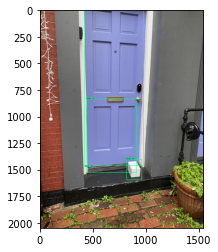

In [22]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

print(detections['detection_boxes'][0])

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [15]:
# !pip uninstall opencv-python-headless -y

In [24]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

px0, py0, px, py = None, None, None, None
x0, y0, x, y = None, None, None, None
theft_threshold = 0
theft_detected = False

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=1,  #5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if theft_detected or (cv2.waitKey(10) & 0xFF == ord('q')):
        cap.release()
        cv2.destroyAllWindows()
        break   
        
    px0, py0, px, py = x0, y0, x, y
    x0, y0, x, y = detections['detection_boxes'][0]
    xmid = (x0+x)/2
    ymid = (y0+y)/2
    print(xmid, ymid)
    
    if not (px0 == None and py0 == None and px == None and py == None):
        pxmid = (px0+px)/2
        pymid = (py0+py)/2
        
        if xmid < pxmid:
            theft_threshold += 1
        else:
            theft_threshold = 0
        
        if theft_threshold >= 10:
            print('Theft Detected')
            theft_detected = True
            
cap.release()
cv2.waitKey(10)
cv2.destroyAllWindows()

0.40271276235580444 0.5452148914337158
0.32035887241363525 0.5429418683052063
0.3206859827041626 0.5417440533638
0.4051037132740021 0.5476506352424622
0.41032320261001587 0.5477344393730164
0.3207390308380127 0.5447497367858887
0.32064908742904663 0.5424070954322815
0.3212512135505676 0.5413271188735962
0.32147490978240967 0.541000247001648
0.3188785910606384 0.5422742366790771
0.302867591381073 0.5539876818656921
0.3211223781108856 0.545490026473999
0.3029799163341522 0.5514546036720276
0.3181661367416382 0.5430267453193665
0.30233892798423767 0.5524178743362427
0.31765854358673096 0.5440994501113892
0.31757158041000366 0.547156035900116
0.3084220588207245 0.5366910099983215
0.29085394740104675 0.5484464764595032
0.33083218336105347 0.5654494166374207
0.7018479704856873 0.8023165464401245
0.30647140741348267 0.6493149399757385
0.8541949391365051 0.36786261200904846
0.3031505346298218 0.5888542532920837
0.3032591640949249 0.579211950302124
0.3009004592895508 0.5760782361030579
0.304467

0.6519141793251038 0.31532418727874756
0.654681384563446 0.3153771162033081
0.6537142395973206 0.31562820076942444
0.6550245881080627 0.3159366548061371
0.6532324552536011 0.31261005997657776
0.6536927223205566 0.31180647015571594
0.6545547246932983 0.3123630881309509
0.6527429819107056 0.312850683927536
0.6538361310958862 0.31151700019836426
0.6501168608665466 0.3124937117099762
0.6488129496574402 0.3128837049007416
0.6509302854537964 0.3129431903362274
0.6501787900924683 0.31265461444854736
0.6503744125366211 0.31181567907333374
0.651046633720398 0.3114910423755646
0.6492094397544861 0.3104362189769745
0.6512205600738525 0.3115038275718689
0.652281641960144 0.3117988705635071
0.6556541919708252 0.3121814429759979
0.6490575671195984 0.31095755100250244
0.6448900699615479 0.31278523802757263
0.6290081739425659 0.310794472694397
0.6126005053520203 0.3190537095069885
0.5966976881027222 0.3214235007762909
0.5957366228103638 0.32171469926834106
0.573712170124054 0.3209352493286133
0.539702

# 10. Freezing the Graph

In [59]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [60]:
command = "python3 {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [61]:
print(command)

python3 Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [62]:
!{command}

2021-12-29 20:31:32.703680: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1229 20:31:32.874729 4577525248 deprecation.py:614] From /Users/jonathanli/Dev/Xilinx Package Detection/XPDCourse/xpd/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
I

2021-12-29 20:31:57.800211: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1229 20:32:14.042040 4577525248 save.py:263] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
I1229 20:32:19.438306 4577525248 builder_impl.py:783] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model/assets
INFO:tensorflow:Writing pipeline config file to Tensorflow/workspace/models/my_ssd_mobnet/export

# 11. Conversion to TFJS

In [63]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.12.0-py3-none-any.whl (77 kB)


In [64]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [65]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [66]:
!{command}

2021-12-29 20:32:30.586739: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-29 20:32:40.756950: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-12-29 20:32:40.757084: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2021-12-29 20:32:41.066305: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1149] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3654 nodes (3244), 4879 edges (4462), time = 194.909ms.
  function_optimizer: function_optimizer did nothing. time = 4.703ms.

2021-12-29 20:32:44.642868: I t

In [67]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [68]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [69]:
command = "python3 {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [70]:
print(command)

python3 Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [71]:
!{command}

2021-12-29 20:33:02.162986: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1229 20:33:11.239526 4502113792 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x1471c2b80>, because it is not built.
W1229 20:33:11.396028 4502113792 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x14742ed30>, because it is not built.
W1229 20:33:11.396214 4502113792 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x1474af490>, because it is not built.
W1229 20:33:11.396320 4502113792 save_impl.py:71] Skipping ful

2021-12-29 20:33:20.495718: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W1229 20:33:35.856709 4502113792 save.py:263] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets
I1229 20:33:40.771604 4502113792 builder_impl.py:783] Assets written to: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/assets


In [72]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [73]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [74]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [75]:
!{command}

2021-12-29 20:33:47.770249: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-29 20:33:59.750447: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-29 20:33:59.750474: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-29 20:33:59.750480: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
2021-12-29 20:33:59.751473: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model
2021-12-29 20:33:59.857077: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags {

# 13. Zip and Export Models 

In [76]:
# !tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')